In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from numpy import pi, sin, cos

pd.set_option("display.precision", 11)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

<h1>O12 Atomspektren</h1>
<p>Simon Legtenborg, Leonie Parsiegel</p>

In [8]:
def GtR(grad,minuten,sekunden):
    g = grad + minuten/60 + sekunden/3600
    return g * 2*pi/360

<h2>Theorie</h2>

Für die Phasendifferenz einer Gitterreflexion gilt:
$\delta = 2 \pi \dfrac{g(\sin \alpha-\sin\beta)}{\lambda}$
Für eine positive konstruktive Interferenz muss die Bedingung
$\delta = k \cdot 2\pi$

Damit ergibt sich für die Beugungsspektren:
$\sin \beta_{max,k}=\sin \alpha- \frac{k \cdot  \lambda}{g}$

<h2>Aufgabe 1</h2>

<p>1. Ermitteln Sie die Gitterkonstante eines Reflexionsgitters.
Dazu sind das reflektierte Licht (0. Ordnung) sowie die ersten drei Beugungsordnungen der grünen
Linie ($\lambda$ = 546.1 nm) einer Hg-Spektrallampe bei einer festen Gitteranordnung (etwa 60°
zwischen
einfallendem Licht und Gitternormale) auszumessen.</p>

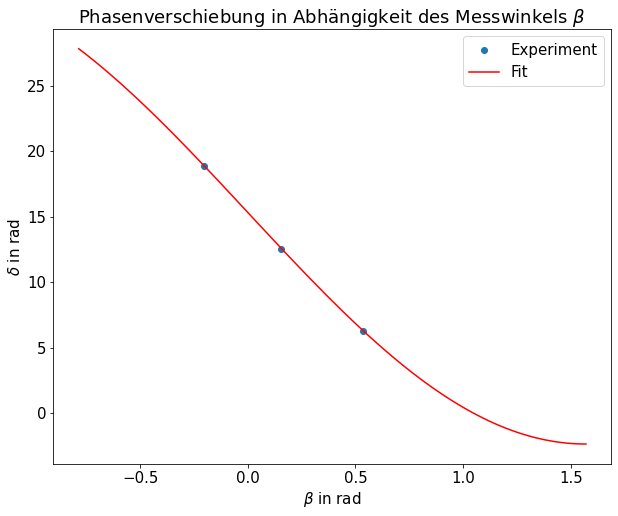

Die Gitterkonstante beträgt 1.536+-0.0001µm 


In [9]:
#alpha einlesen

offset = GtR(0,12,50)
phi0 = GtR(60,2,50)
phi1 = GtR(89,22,50)
phi2 = GtR(111,9,48)
phi3 = GtR(131,39,17)

alpha = (pi-(phi0-offset))/2
dalpha = GtR(0,0,0.5)

#Wellenlänge festlegen
l = 546.1*10**-9

#Fit
def function(x,g):
    return 2*pi*g*(sin(alpha)-sin(x))/l

#Betas einlesen
b1 = alpha - (phi1-phi0)
b2 = alpha - (phi2-phi0)
b3 = alpha - (phi3-phi0)
db = GtR(0,0,0.5)

phase = np.array([2,4,6])*pi
beta = np.array([b1,b2,b3])

g, cov1 = curve_fit(function,beta,phase)
g= g[0]
dg = np.sqrt(cov1[0,0])


plt.scatter(beta, phase, label="Experiment")
x = np.linspace(-pi/4,pi/2,100)
plt.plot(x, function(x, g), label="Fit", color="red")



plt.xlabel(r"$\beta$ in rad")
plt.ylabel(r"$\delta$ in rad")
plt.title(r"Phasenverschiebung in Abhängigkeit des Messwinkels $\beta$")
plt.legend()
plt.show()

print(f"Die Gitterkonstante beträgt {np.round(g*10**6,3)}+-{np.round(dg*10**6,5)}µm ")

<h2>Aufgabe 2</h2>

<p>Bestimmen Sie die acht Wellenlängen von vier Dubletts des Spektrums einer Na-Spektrallampe aus
dem Beugungsspektrum 1. Ordnung. Es ist dieselbe Gitteranordnung wie in Aufgabe 1 zu wählen</p>

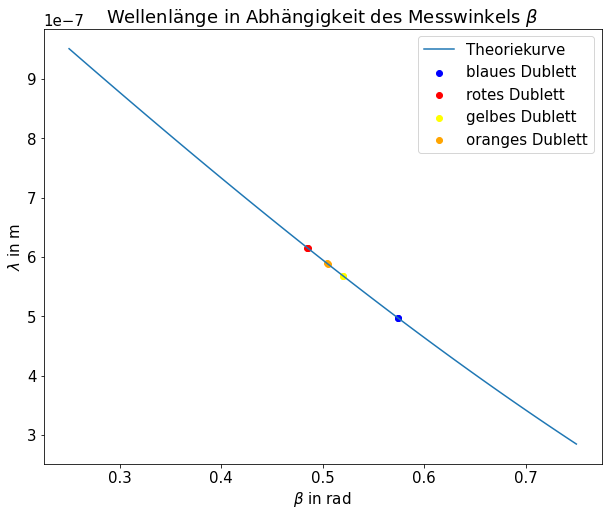

,blau,rot,gelb,orang
0,0.00000049709,0.00000061467,0.00000056773,0.00000058863
1,0.00000049750,0.00000061530,0.00000056841,0.00000058910


In [10]:
#Winkel einlesen
alpha2 = alpha

blau1 = GtR(87,13,52)
blau2 = GtR(87,14,57)
gelb1 = GtR(90,19,0)
gelb2 = GtR(90,20,45)
orange1 = GtR(91,12,40)
orange2 = GtR(91,13,52)
rot1 = GtR(92,18,53)
rot2 = GtR(92,20,30)

d1 = np.array([alpha - (blau1-phi0),alpha - (blau2-phi0)])
d2 = np.array([alpha - (rot1-phi0),alpha - (rot2-phi0)])
d3 = np.array([alpha - (gelb1-phi0),alpha - (gelb2-phi0)])
d4 = np.array([alpha - (orange1-phi0),alpha - (orange2-phi0)])

name = ["blau", "rot", "gelb", "orang"]
name2 = ["blue", "red", "yellow", "orange"]

d = [d1,d2,d3,d4]
l = []
for i in range(4):
    li = g*(sin(alpha2)-sin(d[i]))
    l.append(li)

x2 = np.linspace(0.25,0.75,100)
plt.plot(x2,g*(sin(alpha2)-sin(x2)), label="Theoriekurve")
for i in range(4):
    plt.scatter(d[i], l[i], label=f"{name[i]}es Dublett", color=name2[i])

plt.xlabel(r"$\beta$ in rad")
plt.ylabel(r"$\lambda$ in m")
plt.title(r"Wellenlänge in Abhängigkeit des Messwinkels $\beta$")
plt.legend()
plt.show()

d = {name[0]: l[0], name[1]: l[1], name[2]: l[2],name[3]: l[3] }
df = pd.DataFrame(data=d)
display(df)

<h2>Aufgabe 3</h2>

<p>Berechnen Sie das Auflösungsvermögen des Reflexionsgitters.
Die wirksame Gitterbreite beträgt 50 mm (0.5%).</p>

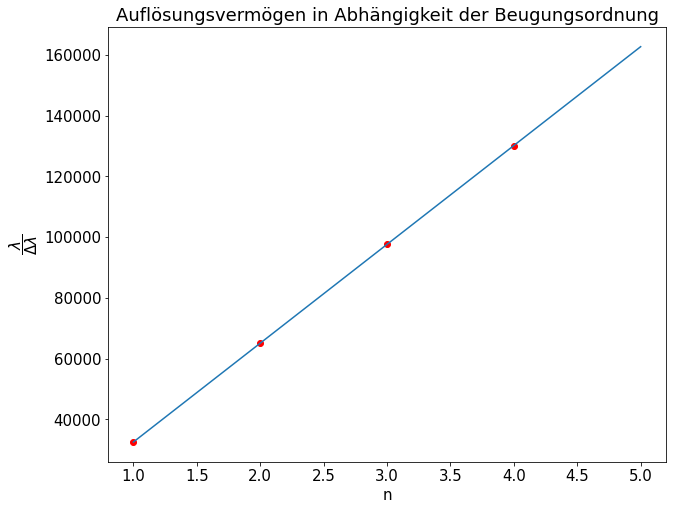

,1. Ordnung,2. Ordnung,3. Ordnung,4. Ordnung
0,32547.82031502045,65095.64063004091,97643.46094506136,130191.28126008181


In [11]:
G = 50e-3
n = np.arange(1,5,1)
x = np.linspace(1,5,100)

A_t = G/g * x
A = G/g * n

plt.plot(x,A_t)
plt.scatter(n, A, color="red")
plt.xlabel("n")
plt.ylabel(r"$\dfrac{\lambda}{\Delta \lambda}$")
plt.title("Auflösungsvermögen in Abhängigkeit der Beugungsordnung")
plt.show()

d = {"1. Ordnung": [A[0]], "2. Ordnung": [A[1]], "3. Ordnung": [A[2]],"4. Ordnung": [A[3]] }
df = pd.DataFrame(data=d)
display(df)